In [175]:
import numpy as np
import scipy.io, scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score

In [7]:
ex6data1 = scipy.io.loadmat("ex6data1.mat")
ex6data2 = scipy.io.loadmat("ex6data2.mat")
ex6data3 = scipy.io.loadmat("ex6data3.mat")

In [8]:
X1 = pd.DataFrame(ex6data1['X'])
y1 = pd.DataFrame(ex6data1['y'].ravel())
print(X1.shape)
print(y1.shape)

(51, 2)
(51, 1)


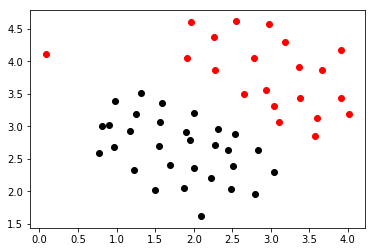

In [9]:
plt.scatter(X1[y1[0] == 1][0], X1[y1[0] == 1][1], color='red')
plt.scatter(X1[y1[0] == 0][0], X1[y1[0] == 0][1], color='black')

In [10]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X1, y1.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

To plot the decision boundary (i.e., maximum-margin separating hyperplane)

http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

In [11]:
svm_weights = svm_clf.coef_[0]
svm_intercept = svm_clf.intercept_[0]

In [12]:
decision_slope = -svm_weights[0]/svm_weights[1]
decision_intercept = -svm_intercept/svm_weights[1]

In [13]:
x_plot = np.arange(-0.5, 4.5, 0.1)
y_plot = decision_slope*x_plot + decision_intercept

Text(0.5,1,'Linear SVM, C=1')

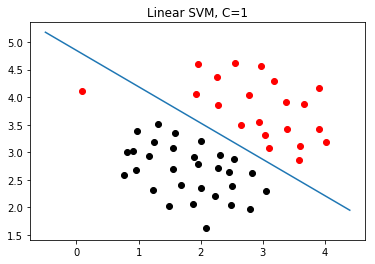

In [14]:
plt.scatter(X1[y1[0] == 1][0], X1[y1[0] == 1][1], color='red')
plt.scatter(X1[y1[0] == 0][0], X1[y1[0] == 0][1], color='black')
plt.plot(x_plot, y_plot)
plt.title("Linear SVM, C=1")

Text(0.5,1,'Linear SVM, C=100')

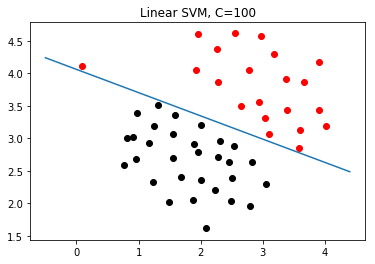

In [15]:
svm_clf = SVC(C=100.0, kernel='linear')
svm_clf.fit(X1, y1.values.ravel())
svm_weights = svm_clf.coef_[0]
svm_intercept = svm_clf.intercept_[0]
decision_slope = -svm_weights[0]/svm_weights[1]
decision_intercept = -svm_intercept/svm_weights[1]
x_plot = np.arange(-0.5, 4.5, 0.1)
y_plot = decision_slope*x_plot + decision_intercept
plt.scatter(X1[y1[0] == 1][0], X1[y1[0] == 1][1], color='red')
plt.scatter(X1[y1[0] == 0][0], X1[y1[0] == 0][1], color='black')
plt.plot(x_plot, y_plot)
plt.title("Linear SVM, C=100")

(863, 2)
(863, 1)


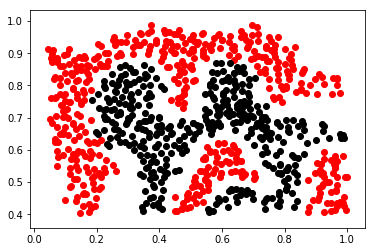

In [16]:
X2 = pd.DataFrame(ex6data2['X'])
y2 = pd.DataFrame(ex6data2['y'].ravel())
print(X2.shape)
print(y2.shape)
plt.scatter(X2[y2[0] == 1][0], X2[y2[0] == 1][1], color='red')
plt.scatter(X2[y2[0] == 0][0], X2[y2[0] == 0][1], color='black')

Using the following example code from scikit-learn documentation to plot RBF decision boundary

http://scikit-learn.org/0.16/auto_examples/svm/plot_iris.html

In [17]:
svm_RBF_clf = SVC(kernel='rbf', C=1, gamma=100)
svm_RBF_clf.fit(X2, y2.values.ravel())
xx, yy = np.meshgrid(np.arange(0, 1, 0.005), np.arange(0.4, 1, 0.005))
z = svm_RBF_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

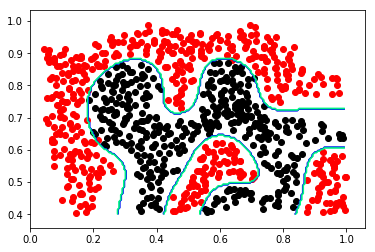

In [18]:
plt.scatter(X2[y2[0] == 1][0], X2[y2[0] == 1][1], color='red')
plt.scatter(X2[y2[0] == 0][0], X2[y2[0] == 0][1], color='black')
plt.contour(xx, yy, z, cmap='winter', linewidths=1.0)

In [19]:
ex6data3 = scipy.io.loadmat("ex6data3.mat")

In [20]:
X3train, y3train, X3val, y3val = ex6data3['X'], ex6data3['y'].ravel(), ex6data3['Xval'], ex6data3['yval'].ravel()

In [21]:
X3 = np.append(X3train, X3val, axis=0)
y3 = np.append(y3train, y3val)
folds = np.append(-np.ones(X3train.shape[0]), np.zeros(X3val.shape[0]))

In [22]:
param_grid = [{'C': [0.1, 1, 10, 100], 'gamma': [1, 10, 50, 100]}]
grid_svc = GridSearchCV(SVC(), param_grid, n_jobs=2, cv=PredefinedSplit(folds))

In [23]:
grid_svc.fit(X3, y3)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [1, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
grid_svc.best_params_

{'C': 1, 'gamma': 50}

In [24]:
xx, yy = np.meshgrid(np.arange(-0.6, 0.4, 0.005), np.arange(-0.7, 0.6, 0.005))
z = grid_svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

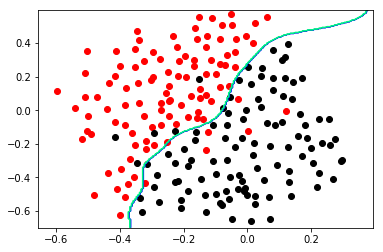

In [25]:
X3train = pd.DataFrame(X3train)
y3train = pd.DataFrame(y3train)
plt.scatter(X3train[y3train[0] == 1][0], X3train[y3train[0] == 1][1], color='red')
plt.scatter(X3train[y3train[0] == 0][0], X3train[y3train[0] == 0][1], color='black')
plt.contour(xx, yy, z, cmap='winter', linewidths=1.0)

___Part 2: Spam classification using support vector machines___

In [26]:
vocab_list = pd.read_csv("vocab.txt", sep='\t', header=None, index_col= 0)
vocab_list.head()
vocab_list.index[vocab_list[1]=='aa'][0]

1

The original Matlab/Octave assignments include a method for preprocessing email strings. I'm going to reimplement this, but since it wasn't part of the original assignment I'm going to use libraries and borrowed code where necessary. First, I am using code from [this Stackoverflow post](https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python) to strip HTML tags — I'm assuming it works, but the sample emails provided don't actually include HTML.

In [136]:
with open('emailSample1.txt', 'r') as email_file:
    email1_str = email_file.read().replace('\n', ' ').replace('\t', ' ')
with open('emailSample2.txt', 'r') as email_file:
    email2_str = email_file.read().replace('\n', ' ').replace('\t', ' ')    

In [137]:
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [46]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

Regular expression for URLs: https://stackoverflow.com/questions/6883049/regex-to-find-urls-in-string-in-python

Regular expression from emails: http://emailregex.com/

Using translate() and str.maketrans() to remove punctuation: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python

In [134]:
import re
import string

def preprocess_email(input):
    # strip HTML tags
    email = strip_tags(input.lower())
    # convert URLs to 'httpaddr' 
    email = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', 'httpaddr', email)
    # convert email addresses to 'emailaddr'
    email = re.sub(r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|\"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*\")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])", 'emailaddr', email)
    # convert numbers to 'number'
    email = re.sub('[0-9]+', 'number', email)
    # convert dollar signs to 'dollar'
    email = re.sub('\$', 'dollar', email)
    words = []
    # split the string into words and stem them
    for word in email.split(' '):
        words.append(stemmer.stem(word))
    email = ' '.join(words)
    # remove all punctuation
    email = email.translate(str.maketrans("", "", string.punctuation))
    # convert all whitespace (spaces, tabs, newlines) to single space
    email = re.sub('\s+', ' ', email).strip()
    return email

Ok, so that's all the preprocessing that *wasn't* part of the assignment. Now we need to convert the email string to word indices, which is much more straightforward.

In [141]:
def email_to_indices(vocab, email_str):
    indices = []
    for word in preprocess_email(email_str).split(' '):
        if(len(word) > 1):
            my_index = vocab.index[vocab[1]==word]
            if(my_index.shape[0] > 0):
                indices.append(my_index[0])
    return indices

In [162]:
email1_indices = email_to_indices(vocab_list, email1_str)
email2_indices = email_to_indices(vocab_list, email2_str)

In [153]:
pd.DataFrame(email1_indices).head()

,0
0,86
1,916
2,794
3,1077
4,883


In [163]:
def indices_to_feature_vec(indices):
    vec = np.zeros(vocab_list.shape[0], dtype='bool')
    for index in indices:
        vec[index] = vec[index] or True
    return vec.astype(int)

In [164]:
print(indices_to_feature_vec(email1_indices).sum())
print(indices_to_feature_vec(email2_indices).sum())

42
114


In [169]:
spamTrain = scipy.io.loadmat("spamTrain.mat")
Xspam_train, yspam_train = spamTrain['X'], spamTrain['y'].ravel()
spamTest = scipy.io.loadmat("spamTest.mat")
Xspam_test, yspam_test = spamTest['Xtest'], spamTest['ytest'].ravel()

In [170]:
param_grid = [{'C': [0.1, 1, 10, 100], 'gamma': [1, 10, 50, 100]}]
grid_svc_spam = GridSearchCV(SVC(), param_grid, n_jobs=2, cv=5)

In [171]:
grid_svc_spam.fit(Xspam_train, yspam_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [1, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [172]:
grid_svc_spam.best_params_

{'C': 10, 'gamma': 1}

In [173]:
grid_svc_spam.best_score_

0.7905

In [176]:
accuracy_score(grid_svc_spam.predict(Xspam_test), yspam_test)

0.809

In [177]:
accuracy_score(grid_svc_spam.predict(Xspam_train), yspam_train)

1.0

Compare grid search results to parameter/kernel choices of instructor-supplied Octave/Matlab

In [178]:
spam_svc = SVC(C = 0.1, kernel='linear')

In [179]:
spam_svc.fit(Xspam_train, yspam_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [180]:
accuracy_score(spam_svc.predict(Xspam_train), yspam_train)

0.99825

In [181]:
accuracy_score(spam_svc.predict(Xspam_test), yspam_test)

0.989

The grid search choice of C=10 and RBF kernel leads to overfitting — it predicts all the training examples correctly (I think... `best_score_` is 0.795... I guess that is cross-validation score? anyway, `accuracy_score` is 1.0), but performs relatively poorly on the test set. 